In [379]:
import pandas as pd
import numpy as np
from scipy import stats
from mlxtend.preprocessing import minmax_scaling
from wordcloud import WordCloud
import seaborn as sns
import missingno 
from datetime import datetime
import matplotlib.pyplot as plt
import squarify
%matplotlib inline

df = pd.read_csv('datasets/Forbes Richest Atheletes (Forbes Richest Athletes 1990-2020).csv')
df

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0
...,...,...,...,...,...,...,...,...
296,297,Stephen Curry,USA,6,9,Basketball,2020,74.4
297,298,Kevin Durant,USA,7,10,Basketball,2020,63.9
298,299,Tiger Woods,USA,8,11,Golf,2020,62.3
299,300,Kirk Cousins,USA,9,>100,American Football,2020,60.5


### The Data
A list of the top 10 world's hgihest-paid athletes according to Forbes from 1990 to 2020. 

**IMPORTANT NOTE:**
* In 2002, Forbes changes the reporting period from the full financial calendar year to June-to-June, thus there are no records for 2001.

#### 1. What question are you trying to solve (or prove wrong)?
#### Univeriate
1. Which athelete appears on the list the most over the 30 year period? Michael Jordan
2. Which nation has the most highest paid atheletes? USA
3. Which sport has the most atheletes appearing on the Forbes list? Basketball

#### Bi-variate
4. What sport has the highest earners on average? Soccer/MMA
5. Which sport has had the most top earners over the 30 year period? Golf
7. How does the highest earner earn each year change over time? 
8. How does the earnings of each sport change over time?

#### 2. What kind of data do you have?
As we can observe, we have 

**S.NO** - [Integer][Continuous] Unique number to identify each entry 

**Name** - [String][Categorial] Name of the athlete

**Nationality** - [String][Categorial] Country the athlete represents legally

**Current Rank** - [Integer][Categorial] Athletes current rank of out the top 10 each year

**Previous Year Rank** - [Integer][Continuous] Ranking from the previous year if applicable 

**Sport** -  [String][Categorial] The sport the athlete does as a profession 

**Year** - [Integer] [Continuous] The year of the ranking

**Earnings** - [Float] [Continuous] The total earning of the athlete in $ millions. 

In [380]:
df.shape

(301, 8)

In [381]:
df.dtypes

S.NO                      int64
Name                     object
Nationality              object
Current Rank              int64
Previous Year Rank       object
Sport                    object
Year                      int64
earnings ($ million)    float64
dtype: object

### Missing Data

In [382]:
missing_values_count = df.isnull().sum()
missing_values_count

S.NO                     0
Name                     0
Nationality              0
Current Rank             0
Previous Year Rank      24
Sport                    0
Year                     0
earnings ($ million)     0
dtype: int64

As missing values can take many forms and we don't know if this data has not been pre-processed to a degree where all missing values are appearing as NaN. 

Missing values can appear as a question mark (?) or a zero (0) or minus one (-1) or a blank. Thus, I'm going to take a further look into this column to see all the unique values to identify any other forms of missing values.

In [383]:
pyr = df['Previous Year Rank'].unique()
pyr

array([nan, '8', '1', '>30', '4', '5', '12', '6', '3', '9', '17', '13',
       '10', '>40', '19', '40', '7', '11', '30', '22', '20', 'not ranked',
       '38', '2', '15', '14', '26', 'none', '18', '>10', '>20', '?', '24',
       '21', '>14', '>100', '??'], dtype=object)

Missing values in this dataframe are appearings as:
* nan
* ?
* ??
* not ranked
* none

I concluded that 'not ranked' is a missing value as 'Mike Tyson' for example didn't have an entry between 1992 to 1994 but reappeared on the list in 1995, thus he would have had some ranking on the Forbes list. Thus I'm going to conclude that these are missing values and not data that is missing because the athlete had no previous ranking previously.

In [384]:
df.replace('?', np.nan, inplace=True) # 24 to 27
df.replace('??', np.nan, inplace=True) #27 to 29
df.replace('not ranked', np.nan, inplace=True) # 29 to 33
df.replace('none', np.nan, inplace=True) #33 to 34

In [385]:
missing_values_count = df.isnull().sum()
missing_values_count

S.NO                     0
Name                     0
Nationality              0
Current Rank             0
Previous Year Rank      34
Sport                    0
Year                     0
earnings ($ million)     0
dtype: int64

<AxesSubplot:>

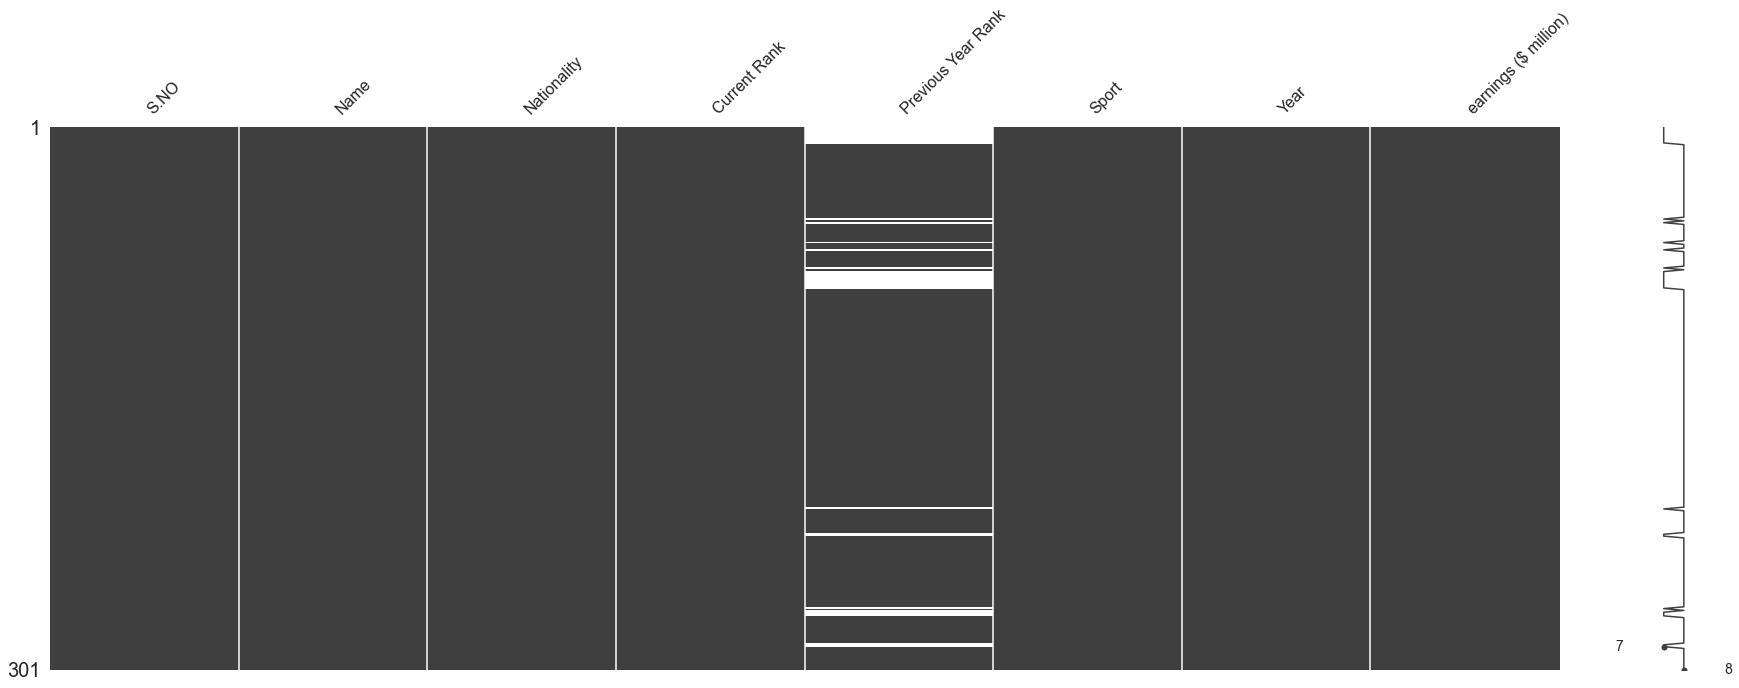

In [386]:
missingno.matrix(df, figsize = (30,10))

In [387]:
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
(total_missing/total_cells) * 100

1.4119601328903655

As these missing values only account for 1.4% of the values missing in the entire dataset, analysis can still be performed on the dataframe.

In [388]:
missing_values_pyr_count = df['Previous Year Rank'].isnull().sum()
missing_values_pyr_count

total_cells = np.product(df['Previous Year Rank'].shape)
perc_missing = missing_values_pyr_count.sum()

# percent of data that is missing
(perc_missing/total_cells) * 100

11.295681063122924

In [389]:
df.groupby('Previous Year Rank').count()

,S.NO,Name,Nationality,Current Rank,Sport,Year,earnings ($ million)
Previous Year Rank,,,,,,,
1,25,25,25,25,25,25,25
10,8,8,8,8,8,8,8
11,6,6,6,6,6,6,6
12,4,4,4,4,4,4,4
13,4,4,4,4,4,4,4
14,2,2,2,2,2,2,2
15,2,2,2,2,2,2,2
17,3,3,3,3,3,3,3
18,2,2,2,2,2,2,2


From the 'Previous Year Rank' column, 11.3% of the data is missing. Furthermore, values in the column that are defined with a 'greater than' symbol are ambigious, and there are 55 of them, which would bring the missing value percentage of the 'Previous Year Rank' to 29.5%. Thus, as this column does not hold any releavance to any analytical insights I'm going to drop this column from the dataset.

In [390]:
temp_df = df.drop(columns="Previous Year Rank", axis=1)
temp_df

,S.NO,Name,Nationality,Current Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,boxing,1990,28.6
1,2,Buster Douglas,USA,2,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,auto racing,1990,10.0
4,5,Alain Prost,France,5,auto racing,1990,9.0
...,...,...,...,...,...,...,...
296,297,Stephen Curry,USA,6,Basketball,2020,74.4
297,298,Kevin Durant,USA,7,Basketball,2020,63.9
298,299,Tiger Woods,USA,8,Golf,2020,62.3
299,300,Kirk Cousins,USA,9,American Football,2020,60.5


## Data Cleansing

Checking each column for duplicates
### Name column

In [391]:
names = temp_df['Name'].unique()
print(f"There are {len(names)} different athletes.")
names

There are 82 different athletes.


array(['Mike Tyson', 'Buster Douglas', 'Sugar Ray Leonard',
       'Ayrton Senna', 'Alain Prost', 'Jack Nicklaus', 'Greg Norman',
       'Michael Jordan', 'Arnold Palmer', 'Evander Holyfield',
       'George Foreman', 'Donovan "Razor" Ruddock', 'Nigel Mansell',
       'Andre Agassi', 'Joe Montana', 'Jim Courier', 'Monica Seles',
       'Riddick Bowe', "Shaquille O'Neal", 'Lennox Lewis',
       'Cecil Fielder', "Shaq O'Neal", 'Gerhard Berger', 'Wayne Gretzky',
       'Michael Moorer', 'Deion Sanders', 'Michael Schumacher',
       'Emmit Smith', 'Dennis Rodman', 'Patrick Ewing',
       'Oscar De La Hoya', 'Tiger Woods', 'Dale Earnhardt', 'Joe Sakic',
       'Grant Hill', 'Sergei Federov', 'Gary Sheffield', 'Kevin Garnett',
       'Kobe Bryant', 'Jacques Villeneuve', 'Jeff Gordon',
       'Alex Rodriguez', 'Peyton Manning', 'David Beckham',
       'Michael Vick', 'Lance Armstrong', 'Valentino Rossi',
       'Muhammad Ali', 'Phil Mickelson', 'Tom Brady', 'Kimi Raikkonen',
       'Ronaldinh

In [392]:
print(sorted(names))

['Aaron Rodgers', 'Aaron Rogers', 'Alain Prost', 'Alex Rodriguez', 'Andre Agassi', 'Andrew Luck', 'Arnold Palmer', 'Ayrton Senna', 'Buster Douglas', 'Cam Newton', 'Canelo Alvarez', 'Carson Wentz', 'Cecil Fielder', 'Conor McGregor', 'Cristiano Ronaldo', 'Dale Earnhardt', 'Dale Earnhardt Jr.', 'David Beckham', 'Deion Sanders', 'Dennis Rodman', 'Donovan "Razor" Ruddock', 'Drew Brees', 'Eli Manning', 'Emmit Smith', 'Evander Holyfield', 'Floyd Mayweather', 'Gary Sheffield', 'George Foreman', 'Gerhard Berger', 'Grant Hill', 'Greg Norman', 'Jack Nicklaus', 'Jacques Villeneuve', 'James Harden', 'Jeff Gordon', 'Jim Courier', 'Joe Montana', 'Joe Sakic', 'Jordan Spieth', 'Kevin Durant', 'Kevin Garnett', 'Kimi Raikkonen', 'Kirk Cousins', 'Kobe Bryant', 'Lance Armstrong', 'LeBron James', 'Lennox Lewis', 'Lewis Hamilton', 'Lionel Messi', 'Manny Pacquiao', 'Matt Ryan', 'Matthew Stafford', 'Michael Jordan', 'Michael Moorer', 'Michael Schumacher', 'Michael Vick', 'Mike Tyson', 'Monica Seles', 'Muhammad

We will investigate the following athletes to determine there is a spelling error or their names are very similar, and make an necessary corrections:
1. Aaron Rodgers, Aaron Rogers
2. Shaq O'Neal, Shaquille O'Neal

In [393]:
temp_df[(temp_df['Name'] == 'Aaron Rodgers') | (temp_df['Name'] == 'Aaron Rogers')]

,S.NO,Name,Nationality,Current Rank,Sport,Year,earnings ($ million)
226,227,Aaron Rodgers,USA,6,American Football,2013,49.0
287,288,Aaron Rogers,USA,7,American Football,2019,89.3


In [394]:
temp_df[(temp_df['Name'] == "Shaq O'Neal") | (temp_df['Name'] == "Shaquille O'Neal")]

,S.NO,Name,Nationality,Current Rank,Sport,Year,earnings ($ million)
35,36,Shaquille O'Neal,USA,6,NBA,1993,15.2
41,42,Shaq O'Neal,USA,2,Basketball,1994,16.7
54,55,Shaquille O'Neal,USA,5,basketball,1995,21.9
63,64,Shaquille O'Neal,USA,4,Basketball,1996,24.4
76,77,Shaquille O'Neal,USA,7,Basketball,1997,25.4
96,97,Shaq O'Neal,USA,7,Basketball,1999,31.0
106,107,Shaq O'Neal,USA,7,Basketball,2000,24.0
115,116,Shaquille O'Neal,USA,5,Basketball,2002,24.0
124,125,Shaq O'Neal,USA,4,Basketball,2003,30.5
135,136,Shaquille O'Neal,USA,5,basketball,2004,31.9


Both athletes appear to be the same person from doing some external research thus their names will be adjusted accordingly.
Aaron Rodgers second entry in the dataset appears to be a typo, and Shaquille O'Neal's is a matter of a nick name being used.

In [395]:
temp_df.loc[temp_df['Name'] == 'Aaron Rogers', 'Name'] = 'Aaron Rodgers'
temp_df.loc[temp_df['Name'] == "Shaq O'Neal", 'Name'] = "Shaquille O'Neal"

In [396]:
names = temp_df['Name'].unique()
print(f"There are {len(names)} different athletes.")
print(sorted(names))

There are 80 different athletes.
['Aaron Rodgers', 'Alain Prost', 'Alex Rodriguez', 'Andre Agassi', 'Andrew Luck', 'Arnold Palmer', 'Ayrton Senna', 'Buster Douglas', 'Cam Newton', 'Canelo Alvarez', 'Carson Wentz', 'Cecil Fielder', 'Conor McGregor', 'Cristiano Ronaldo', 'Dale Earnhardt', 'Dale Earnhardt Jr.', 'David Beckham', 'Deion Sanders', 'Dennis Rodman', 'Donovan "Razor" Ruddock', 'Drew Brees', 'Eli Manning', 'Emmit Smith', 'Evander Holyfield', 'Floyd Mayweather', 'Gary Sheffield', 'George Foreman', 'Gerhard Berger', 'Grant Hill', 'Greg Norman', 'Jack Nicklaus', 'Jacques Villeneuve', 'James Harden', 'Jeff Gordon', 'Jim Courier', 'Joe Montana', 'Joe Sakic', 'Jordan Spieth', 'Kevin Durant', 'Kevin Garnett', 'Kimi Raikkonen', 'Kirk Cousins', 'Kobe Bryant', 'Lance Armstrong', 'LeBron James', 'Lennox Lewis', 'Lewis Hamilton', 'Lionel Messi', 'Manny Pacquiao', 'Matt Ryan', 'Matthew Stafford', 'Michael Jordan', 'Michael Moorer', 'Michael Schumacher', 'Michael Vick', 'Mike Tyson', 'Monica 

### Nationality column

In [397]:
nationality = temp_df['Nationality'].unique()
print(f"There are {len(nationality)} unique nations")
nationality

There are 22 unique nations


array(['USA', 'Brazil', 'France', 'Australia', 'Canada', 'UK', 'Austria',
       'Germany', 'Russia', 'Italy', 'Finland', 'Switzerland',
       'Philippines', 'Portugal', 'Dominican', 'Argentina', 'Filipino',
       'Spain', 'Serbia', 'Northern Ireland', 'Ireland', 'Mexico'],
      dtype=object)

Due to nature of the title of the column there have been so inconsistent data entries, thus the following entries will need to adjusted such as 'Filipino' to 'Phillippines' and 'Dominican' to 'USA' for Alex Rodriguez the baseball player as he represent the USA when participating in the sport. 

In [398]:
temp_df.loc[temp_df['Nationality'] == 'Filipino', 'Nationality'] = 'Philippines'
temp_df.loc[temp_df['Nationality'] == 'Dominican', 'Nationality'] = 'USA'

In [399]:
nationality = temp_df['Nationality'].unique()
print(f"There are {len(nationality)} unique nations")
nationality

There are 20 unique nations


array(['USA', 'Brazil', 'France', 'Australia', 'Canada', 'UK', 'Austria',
       'Germany', 'Russia', 'Italy', 'Finland', 'Switzerland',
       'Philippines', 'Portugal', 'Argentina', 'Spain', 'Serbia',
       'Northern Ireland', 'Ireland', 'Mexico'], dtype=object)

### Sport column

In [400]:
sports = temp_df['Sport'].unique()
print(f"There are {len(sports)} unique sports.")
sports

There are 29 unique sports.


array(['boxing', 'auto racing', 'golf', 'basketball', 'Basketball',
       'Boxing', 'Auto Racing', 'Golf', 'Tennis', 'NFL', 'Auto racing',
       'NBA', 'Baseball', 'Ice Hockey', 'American Football / Baseball',
       'tennis', 'ice hockey', 'F1 Motorsports', 'NASCAR', 'Hockey',
       'Auto Racing (Nascar)', 'F1 racing', 'American Football', 'soccer',
       'baseball', 'cycling', 'motorcycle gp', 'Soccer', 'MMA'],
      dtype=object)

In [401]:
temp_df['Sport'] = temp_df['Sport'].str.lower()
sports = temp_df['Sport'].unique()
print(f"There are {len(sports)} unique sports.")
sports

There are 20 unique sports.


array(['boxing', 'auto racing', 'golf', 'basketball', 'tennis', 'nfl',
       'nba', 'baseball', 'ice hockey', 'american football / baseball',
       'f1 motorsports', 'nascar', 'hockey', 'auto racing (nascar)',
       'f1 racing', 'american football', 'soccer', 'cycling',
       'motorcycle gp', 'mma'], dtype=object)

As there are duplicates in the 'Sport' column, we are going to fix these values.
We can see that there are different names used for auto sports, thus we are going to investifate atheletes in these sports.

We are going to put these athelete's in a temporary dataframe so we can investigate the accuracy of the data more easily of the atheletes in to automotive sports.

In [402]:
sport_ar_df = temp_df[(temp_df['Sport'] == 'auto racing') | (temp_df['Sport'] == 'nascar') | (temp_df['Sport'] == 'auto racing (nascar)') | (temp_df['Sport'] == 'f1 motorsports') | (temp_df['Sport'] == 'f1 racing')]
sport_ar_df

,S.NO,Name,Nationality,Current Rank,Sport,Year,earnings ($ million)
3,4,Ayrton Senna,Brazil,4,auto racing,1990,10.0
4,5,Alain Prost,France,5,auto racing,1990,9.0
14,15,Ayrton Senna,Brazil,5,auto racing,1991,13.0
15,16,Alain Prost,France,6,auto racing,1991,11.0
18,19,Nigel Mansell,UK,9,auto racing,1991,9.0
22,23,Ayrton Senna,Brazil,3,auto racing,1992,22.0
23,24,Nigel Mansell,UK,4,auto racing,1992,14.5
32,33,Ayrton Senna,Brazil,3,auto racing,1993,18.5
33,34,Alain Prost,France,4,auto racing,1993,16.0
44,45,Gerhard Berger,Austria,5,auto racing,1994,13.5


In [403]:
sport_ar_df.sort_values(by=['Name'])

,S.NO,Name,Nationality,Current Rank,Sport,Year,earnings ($ million)
4,5,Alain Prost,France,5,auto racing,1990,9.0
15,16,Alain Prost,France,6,auto racing,1991,11.0
33,34,Alain Prost,France,4,auto racing,1993,16.0
3,4,Ayrton Senna,Brazil,4,auto racing,1990,10.0
14,15,Ayrton Senna,Brazil,5,auto racing,1991,13.0
22,23,Ayrton Senna,Brazil,3,auto racing,1992,22.0
32,33,Ayrton Senna,Brazil,3,auto racing,1993,18.5
84,85,Dale Earnhardt,USA,5,nascar,1998,24.1
77,78,Dale Earnhardt,USA,8,nascar,1997,19.1
98,99,Dale Earnhardt,USA,9,auto racing,1999,26.5


We are going to make a clear distinction between Formula 1 drivers and NASCAR drivers by putting the drivers into the apporiate catgeory - 'f1 racing' or 'nascar. The 11 drivers will be organised into the following 'Sport' categories:
1. Alain Prost - f1 racing
2. Ayrton Senna - f1 racing
3. Dale Earnhardt - nascar
4. Dale Earnhardt Jr. - nascar (done)
5. Gerhard Berger - f1 racing 
6. Jacques Villeneuve - f1 racing
7. Jeff Gordon - nascar
8. Kimi Raikkonen - f1 racing (done)
9. Lewis Hamilton - f1 racing
10. Michael Schumacher - f1 racing
11. Nigel Mansell - f1 racing

In [404]:
temp_df.loc[temp_df['Name'] == 'Ayrton Senna', 'Sport'] = 'f1 racing'
temp_df.loc[temp_df['Name'] == 'Alain Prost', 'Sport'] = 'f1 racing'
temp_df.loc[temp_df['Name'] == 'Dale Earnhardt', 'Sport'] = 'nascar'
temp_df.loc[temp_df['Name'] == 'Gerhard Berger', 'Sport'] = 'f1 racing'
temp_df.loc[temp_df['Name'] == 'Jacques Villeneuve', 'Sport'] = 'f1 racing'
temp_df.loc[temp_df['Name'] == 'Jeff Gordon', 'Sport'] = 'nascar'
temp_df.loc[temp_df['Name'] == 'Lewis Hamilton', 'Sport'] = 'f1 racing'
temp_df.loc[temp_df['Name'] == 'Michael Schumacher', 'Sport'] = 'f1 racing'
temp_df.loc[temp_df['Name'] == 'Nigel Mansell', 'Sport'] = 'f1 racing'

In [405]:
sports = temp_df['Sport'].unique()
print(f"There are {len(sports)} unique sports.")
sports

There are 17 unique sports.


array(['boxing', 'f1 racing', 'golf', 'basketball', 'tennis', 'nfl',
       'nba', 'baseball', 'ice hockey', 'american football / baseball',
       'nascar', 'hockey', 'american football', 'soccer', 'cycling',
       'motorcycle gp', 'mma'], dtype=object)

In [406]:
sport_bb_df = temp_df[(temp_df['Sport'] == 'nba') | (temp_df['Sport'] == 'basketball')]
sport_bb_df

,S.NO,Name,Nationality,Current Rank,Sport,Year,earnings ($ million)
7,8,Michael Jordan,USA,8,basketball,1990,8.1
12,13,Michael Jordan,USA,3,basketball,1991,16.0
20,21,Michael Jordan,USA,1,basketball,1992,35.9
30,31,Michael Jordan,USA,1,basketball,1993,36.0
35,36,Shaquille O'Neal,USA,6,nba,1993,15.2
...,...,...,...,...,...,...,...
289,290,Stephen Curry,USA,9,basketball,2019,79.8
290,291,Kevin Durant,USA,10,basketball,2019,65.4
295,296,LeBron James,USA,5,basketball,2020,88.2
296,297,Stephen Curry,USA,6,basketball,2020,74.4


In [407]:
temp_df.loc[temp_df['Sport'] == "nba", 'Sport'] = 'basketball'

In [408]:
sports = temp_df['Sport'].unique()
print(f"There are {len(sports)} unique sports.")
sports

There are 16 unique sports.


array(['boxing', 'f1 racing', 'golf', 'basketball', 'tennis', 'nfl',
       'baseball', 'ice hockey', 'american football / baseball', 'nascar',
       'hockey', 'american football', 'soccer', 'cycling',
       'motorcycle gp', 'mma'], dtype=object)

In [409]:
sport_af_df = temp_df[(temp_df['Sport'] == 'nfl') | (temp_df['Sport'] == 'american football')]
sport_af_df

,S.NO,Name,Nationality,Current Rank,Sport,Year,earnings ($ million)
26,27,Joe Montana,USA,7,nfl,1992,9.5
39,40,Joe Montana,USA,10,nfl,1993,11.5
64,65,Emmit Smith,USA,5,nfl,1996,16.5
133,134,Peyton Manning,USA,3,american football,2004,42.0
144,145,Michael Vick,USA,4,american football,2005,37.5
160,161,Tom Brady,USA,9,american football,2006,29.0
199,200,Eli Manning,USA,9,american football,2010,39.9
200,201,Terrell Suggs,USA,10,american football,2010,38.3
220,221,Peyton Manning,USA,10,american football,2012,42.4
225,226,Drew Brees,USA,5,american football,2013,51.0


In [410]:
temp_df.loc[temp_df['Sport'] == "nfl", 'Sport'] = 'american football'

In [411]:
sports = temp_df['Sport'].unique()
print(f"There are {len(sports)} unique sports.")
sports

There are 15 unique sports.


array(['boxing', 'f1 racing', 'golf', 'basketball', 'tennis',
       'american football', 'baseball', 'ice hockey',
       'american football / baseball', 'nascar', 'hockey', 'soccer',
       'cycling', 'motorcycle gp', 'mma'], dtype=object)

In [412]:
sport_ic_df = temp_df[(temp_df['Sport'] == 'ice hockey') | (temp_df['Sport'] == 'hockey')]
sport_ic_df

,S.NO,Name,Nationality,Current Rank,Sport,Year,earnings ($ million)
45,46,Wayne Gretzky,Canada,5,ice hockey,1994,13.5
59,60,Wayne Gretzky,Canada,10,ice hockey,1995,14.5
78,79,Joe Sakic,Canada,9,hockey,1997,17.9
82,83,Sergei Federov,Russia,3,ice hockey,1998,29.8


In [413]:
temp_df.loc[temp_df['Sport'] == "hockey", 'Sport'] = 'ice hockey'

In [414]:
sports = temp_df['Sport'].unique()
print(f"There are {len(sports)} unique sports.")
sports

There are 14 unique sports.


array(['boxing', 'f1 racing', 'golf', 'basketball', 'tennis',
       'american football', 'baseball', 'ice hockey',
       'american football / baseball', 'nascar', 'soccer', 'cycling',
       'motorcycle gp', 'mma'], dtype=object)

In [415]:
temp_df[['Name', 'Nationality', 'Sport']].describe()

,Name,Nationality,Sport
count,301,301,301
unique,80,20,14
top,Michael Jordan,USA,basketball
freq,19,207,82


* Michael Jordan appeared on the list a total of 19 times over the 30 year period. 
* The USA has the most athletes appearing within the top 10 highest earners over the 30 year period, with 68% of the athletes coming from the USA.
* Athlete's who play basketball are the most frequent athletes who appear on the Forbes highest earners list 27% of the highest earners being basketball players. 

In [416]:
temp_df[['Current Rank', 'Year', 'earnings ($ million)']].describe()

,Current Rank,Year,earnings ($ million)
count,301.000000,301.000000,301.000000
mean,5.448505,2005.122924,45.516279
std,2.850995,9.063563,33.525337
min,1.000000,1990.000000,8.100000
25%,3.000000,1997.000000,24.000000
50%,5.000000,2005.000000,39.000000
75%,8.000000,2013.000000,59.400000
max,10.000000,2020.000000,300.000000


* The mean current rank is greater than 5 as some years multiple athletes can share a rank as they had the same earnings, thus making the mean slighltly higher than expected. This would also explain the low standard deviation. 
* The mean year is higher then expected, as there were no entries in 2001 due to a change is how the financial year was determined, 2002 their were 11 atheletes included within the top 10 as 2 atheletes ties for the 10th spot on the list, thus making the mean year lower than 2005.5.
* The mean earnings over the 30 year period was \\$45.5 million with a minimum of \\$8 million and a maximum of \\$300 million.

## Plots

### 1. Which athelete appears on the Forbes list the most?

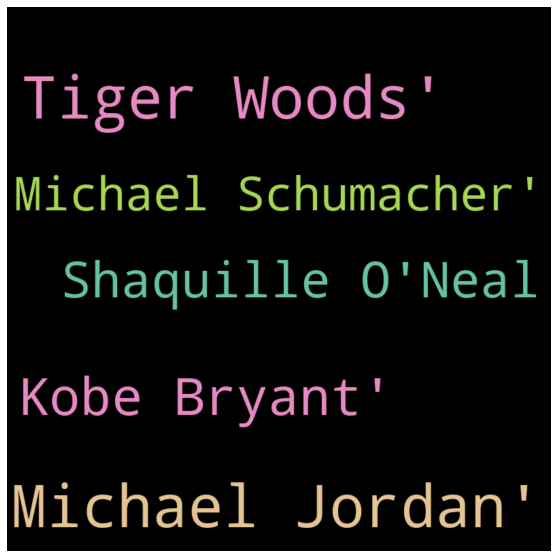

In [417]:
text = temp_df['Name'].values
wordcloud = WordCloud(width = 800, height = 800, margin = 10, max_words=5, max_font_size=150, colormap='Set2', random_state=1).generate(str(text))
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.margins(x = 0, y = 0)
plt.show()

### 2. Which country has the most atheletes on the Forbes highest earning atheletes list?

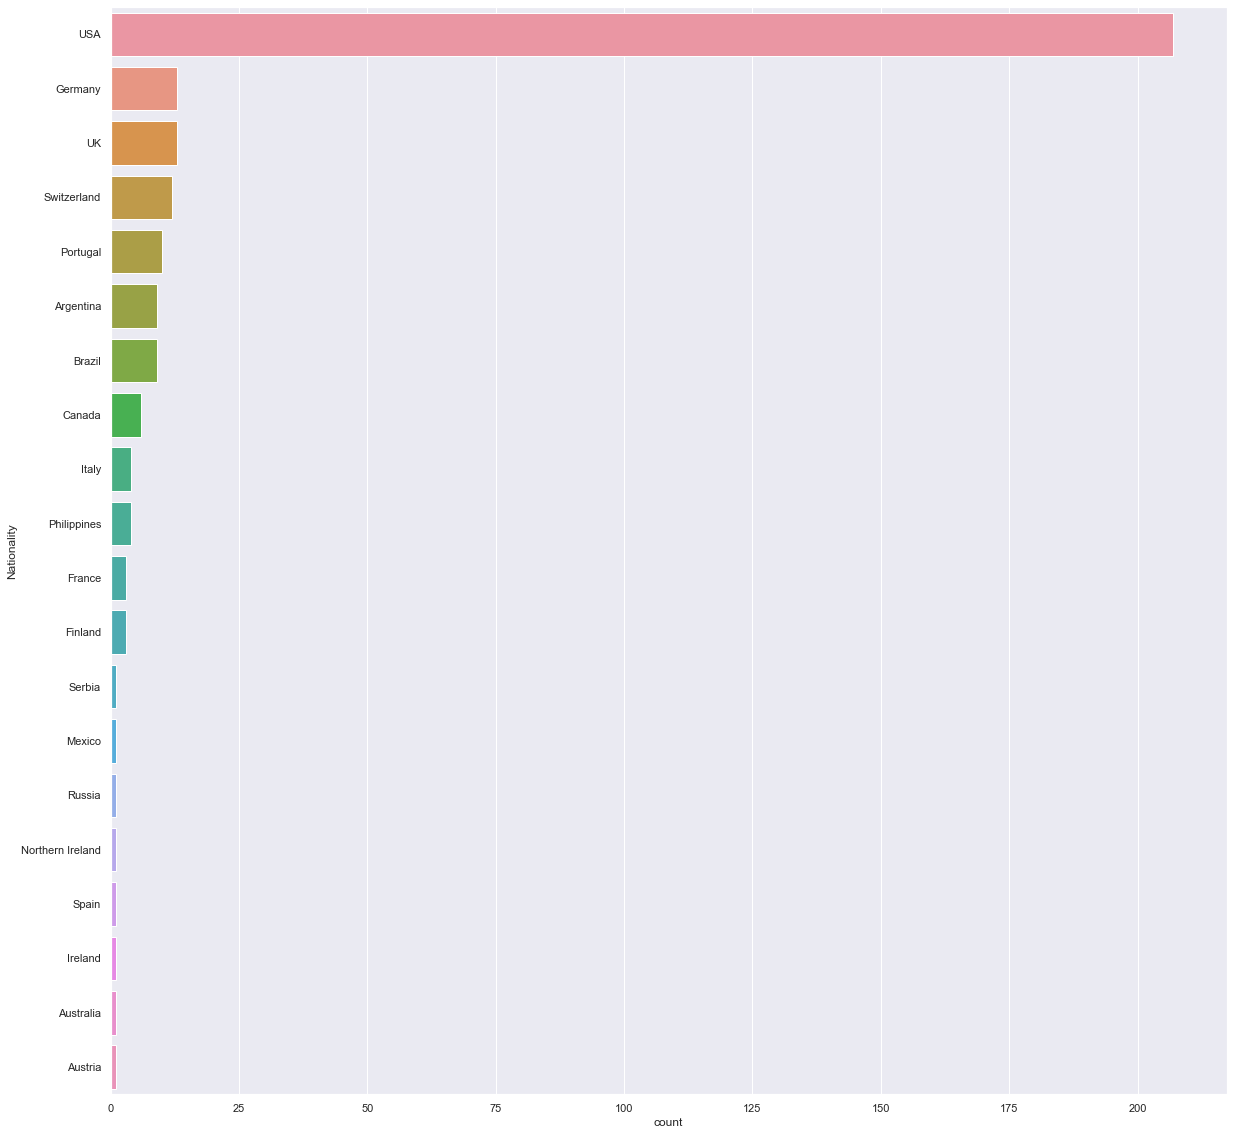

In [418]:
fig = plt.figure(figsize=(20,20))
sns.countplot(y='Nationality', data=temp_df, order=temp_df['Nationality'].value_counts().index);

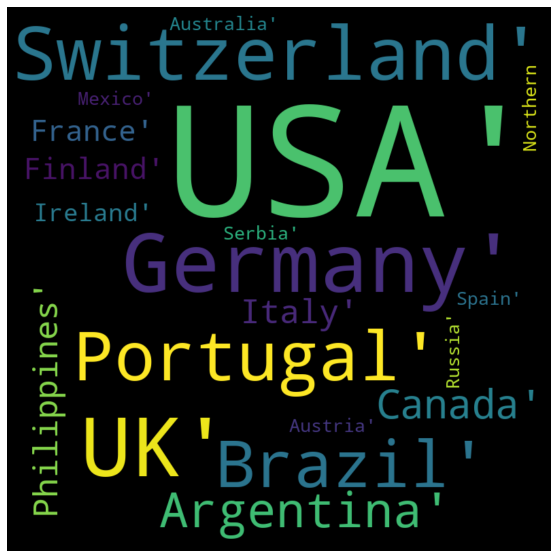

In [419]:
text = temp_df['Nationality'].values
wordcloud = WordCloud(width = 800, height = 800, margin = 10).generate(str(text))
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.margins(x = 0, y = 0)
plt.show()

### 3. Which sport has the most athletes that appear on the Forbes list?

<AxesSubplot:xlabel='Sport', ylabel='count'>

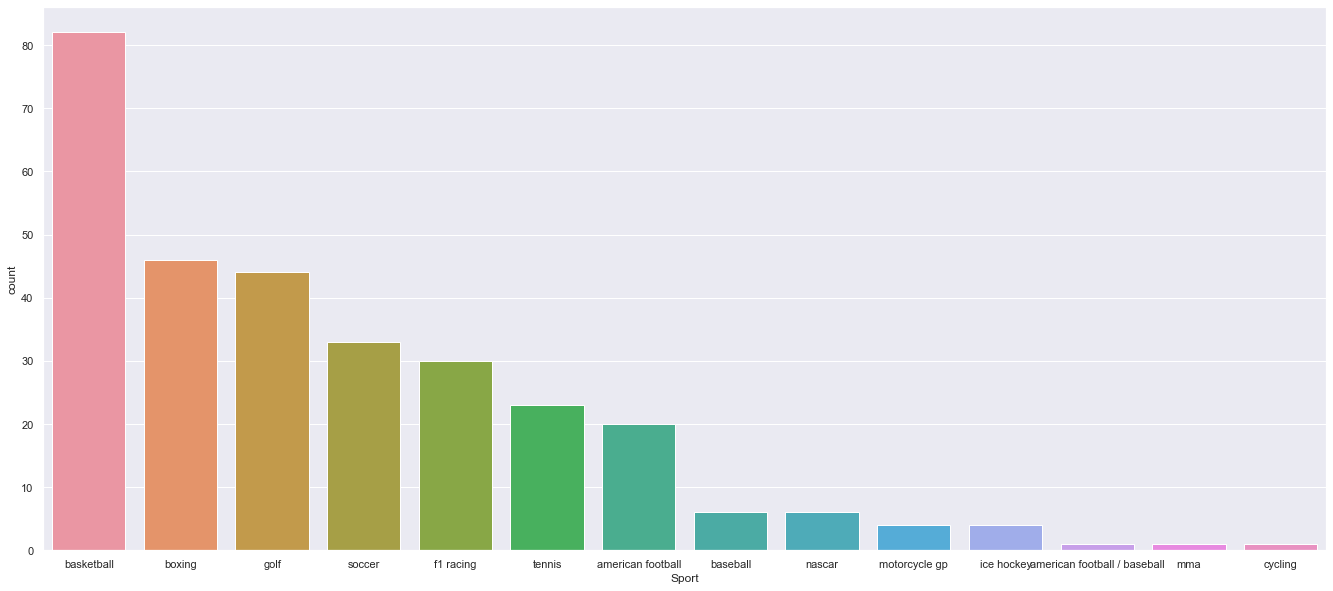

In [420]:
sns.set(rc={"figure.figsize": (23, 10)})
sns.countplot(data=temp_df, x=temp_df.Sport.explode(), order=temp_df.Sport.explode().value_counts().index)

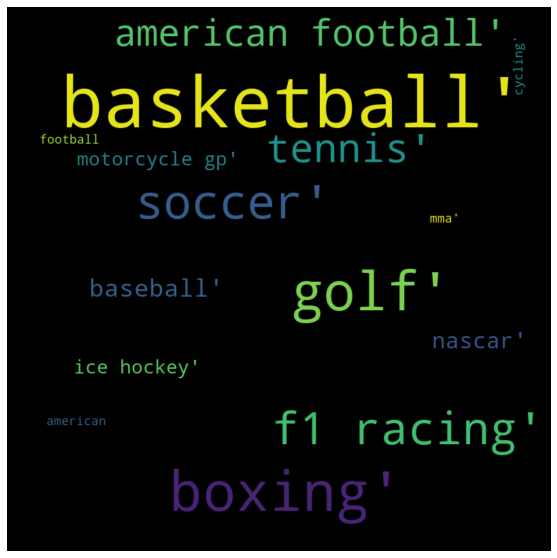

In [421]:
text = temp_df['Sport'].values
wordcloud = WordCloud(width = 800, height = 800, margin = 10).generate(str(text))
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.margins(x = 0, y = 0)
plt.show()

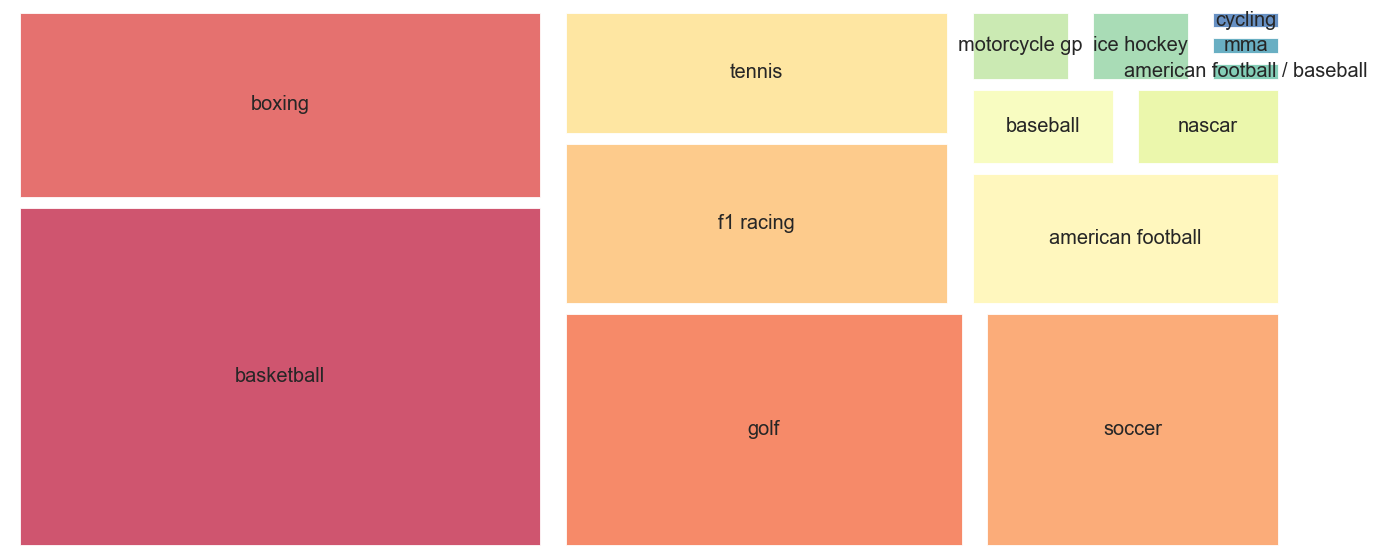

In [422]:
squarify.plot(sizes=temp_df['Sport'].value_counts(), label=temp_df['Sport'].value_counts().index,
             color=sns.color_palette("Spectral", len(temp_df['Sport'].value_counts())), alpha=0.8, 
              text_kwargs={'fontsize': 20}, pad=True)
plt.axis("off")
plt.show()

### 4. Which sport on average has the athelete's with the highest earnings? 

In [423]:
gb_s = temp_df.groupby(by=['Sport']).mean()
gb_s

,S.NO,Current Rank,Year,earnings ($ million)
Sport,,,,
american football,207.500000,7.600000,2010.750000,46.935000
american football / baseball,53.000000,3.000000,1995.000000,22.500000
baseball,127.500000,8.500000,2002.500000,24.350000
basketball,157.975610,5.573171,2005.853659,41.869512
boxing,101.891304,4.108696,2000.086957,49.973913
cycling,150.000000,9.000000,2005.000000,28.000000
f1 racing,94.200000,4.766667,1999.333333,33.493333
golf,144.636364,4.840909,2004.545455,48.556818
ice hockey,67.000000,6.750000,1996.000000,18.925000


<AxesSubplot:xlabel='Sport', ylabel='earnings ($ million)'>

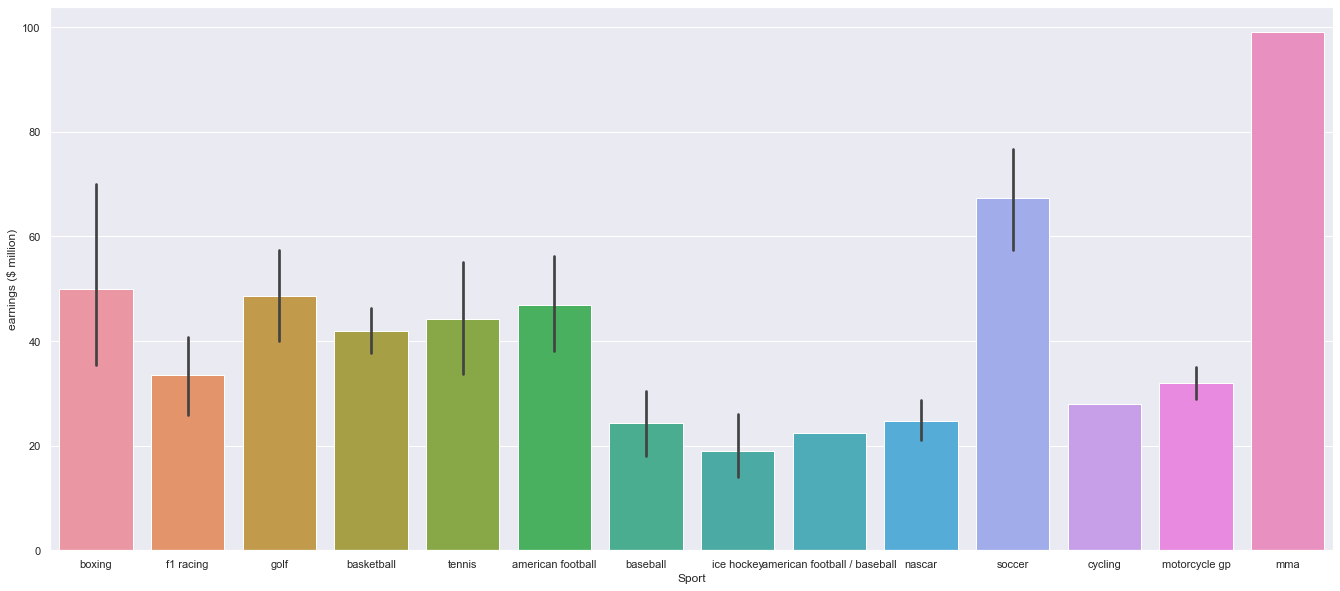

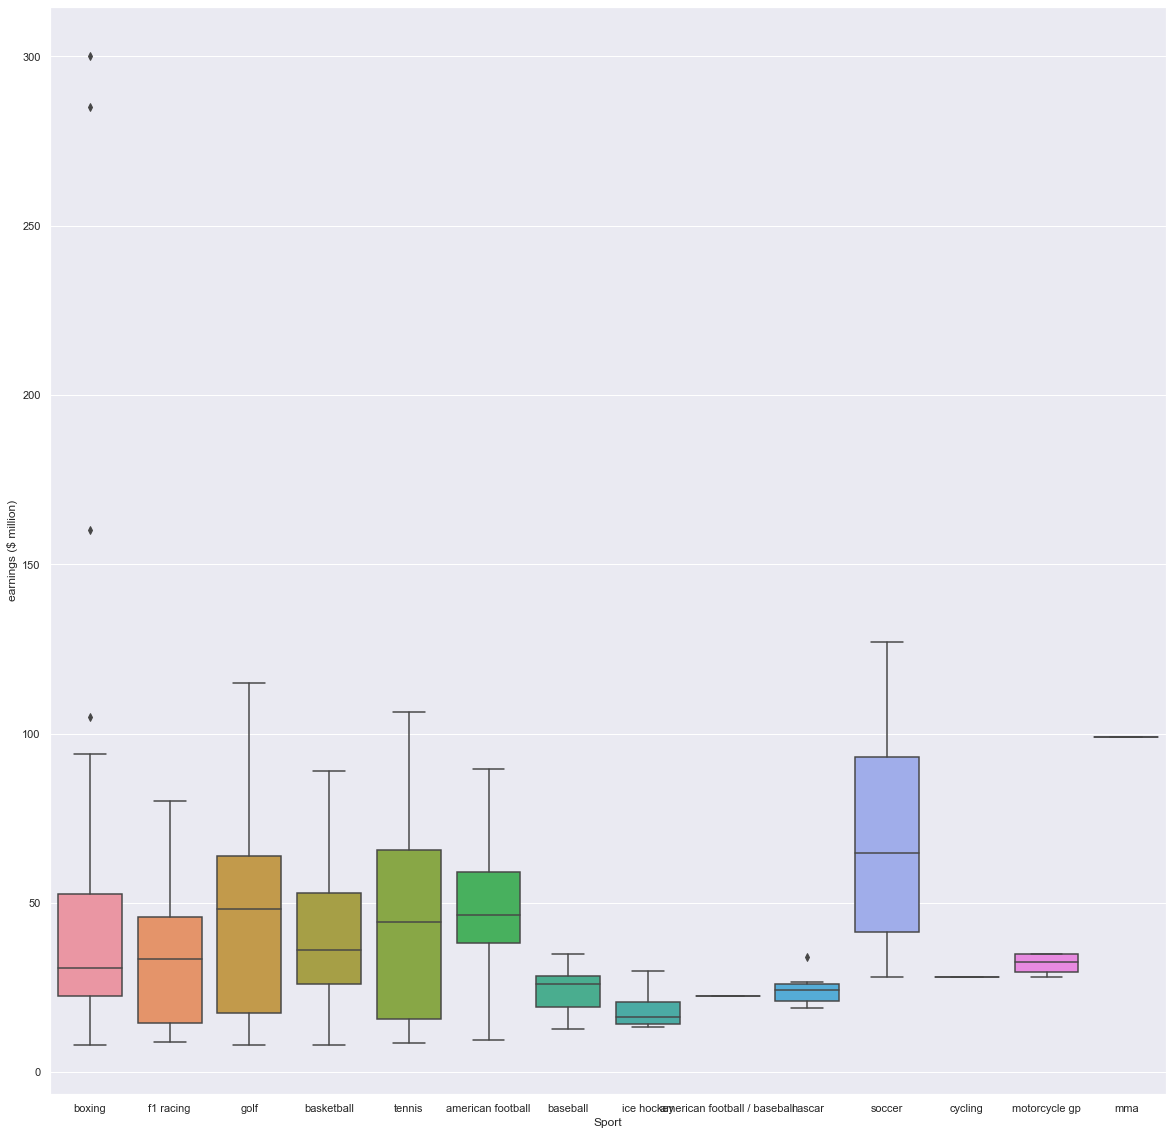

In [424]:
sns.barplot(data=temp_df, x='Sport', y='earnings ($ million)')
fig= plt.figure(figsize=(20, 20))
sns.boxplot(x="Sport" , y="earnings ($ million)" ,data=temp_df)

### 5. Which sport has had the most top earners over the 30 year period?

<Figure size 2160x3600 with 0 Axes>

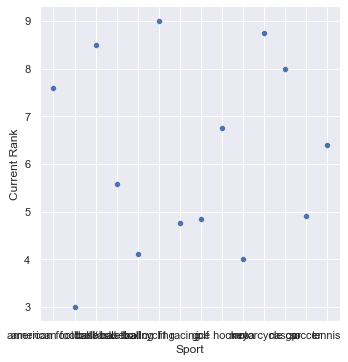

In [425]:
fig = plt.figure(figsize=(30,50))
sns.relplot(data=gb_s, x='Sport', y='Current Rank')

In [426]:
gb_sy = temp_df.groupby(by=['Sport', 'Year'])
gb_sy.first()

S.NO            Name  Nationality  Current Rank  \
Sport             Year                                                    
american football 1992    27     Joe Montana          USA             7   
                  1993    40     Joe Montana          USA            10   
                  1996    65     Emmit Smith          USA             5   
                  2004   134  Peyton Manning          USA             3   
                  2005   145    Michael Vick          USA             4   
...                      ...             ...          ...           ...   
tennis            2016   255   Roger Federer  Switzerland             4   
                  2017   265   Roger Federer  Switzerland             4   
                  2018   278   Roger Federer  Switzerland             7   
                  2019   286   Roger Federer  Switzerland             5   
                  2020   292   Roger Federer  Switzerland             1   

                        earnings ($ million)  
Sport             Year                        
american football 1992                   9.5  
                  1993                  11.5  
                  1996                  16.5  
                  2004                  42.0  
                  2005                  37.5  
...                                      ...  
tennis            2016                  67.8  
                  2017                  64.0  
                  2018                  77.2  
                  2019                  93.4  
                  2020                 106.3  

[174 rows x 5 columns]

In [427]:
gby = temp_df.groupby(by=['Year'])
gby.first()

,S.NO,Name,Nationality,Current Rank,Sport,earnings ($ million)
Year,,,,,,
1990,1,Mike Tyson,USA,1,boxing,28.6
1991,11,Evander Holyfield,USA,1,boxing,60.5
1992,21,Michael Jordan,USA,1,basketball,35.9
1993,31,Michael Jordan,USA,1,basketball,36.0
1994,41,Michael Jordan,USA,1,basketball,30.0
1995,51,Michael Jordan,USA,1,basketball,43.9
1996,61,Mike Tyson,USA,1,boxing,75.0
1997,71,Michael Jordan,USA,1,basketball,78.3
1998,81,Michael Jordan,USA,1,basketball,69.0


In [428]:
r1_df = temp_df.drop(temp_df[temp_df['Current Rank'] != 1].index)

[Text(0.5, 1.0, 'Count of athletes ranked as the highest earning for a particular year')]

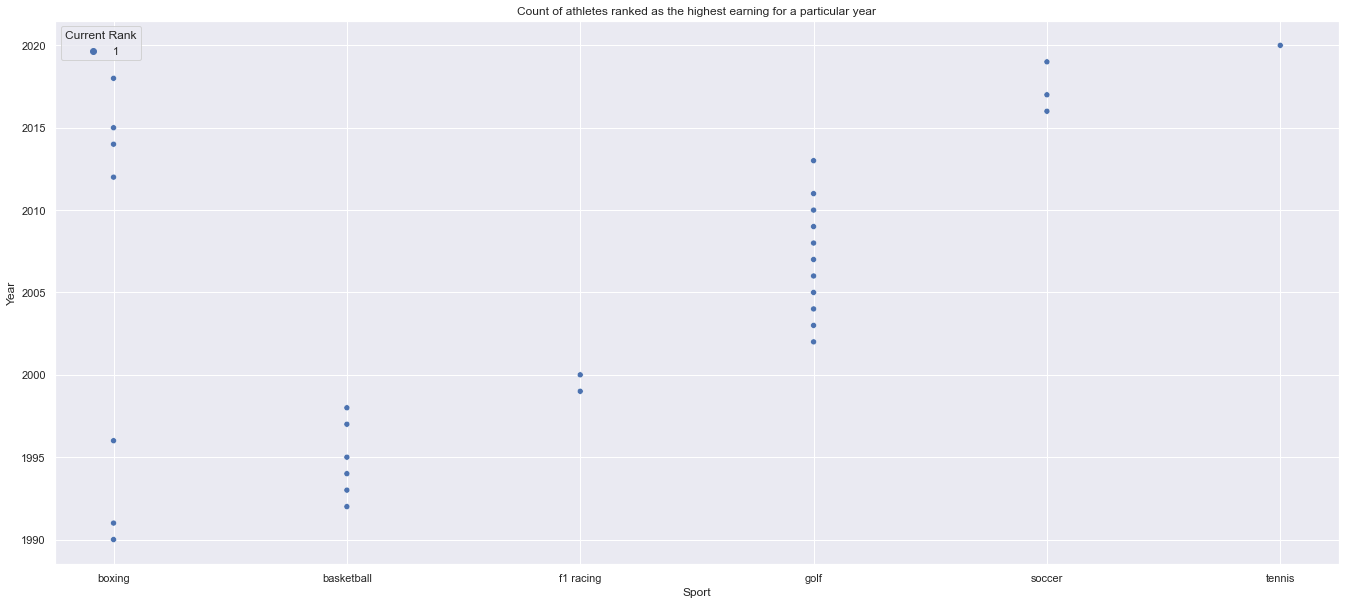

In [429]:
sns.scatterplot(data = r1_df, x="Sport", y="Year", hue="Current Rank").set(title="Count of athletes ranked as the highest earning for a particular year")

* 'golf' has had the most highest paid athlete the most times over the 30 year period
* We can see through different periods only 6 of the 14 sports are producing the highest paid athelete over the 30 year period.
    * From 1990 - 1991 'boxing' has the highest paid athlete of those years and again briefly in 1997.
    * From 1993 - 1998 (excluding 1997) 'basketball' had a longer period of having the highest paid athelete each year which can be attributed to the frequency of 'Michael Jordan' appearing of the top 10 list multiple times.
    * From 1999 - 2000 'f1 racing' brifely held the spot for the highest paid athlete 'Michael Schumacher'
    * From 2002 - 2013 (excluding 2012) 'golf' had the highest paid athlete which is due to the success of 'Tiger Woods' golfing career
 

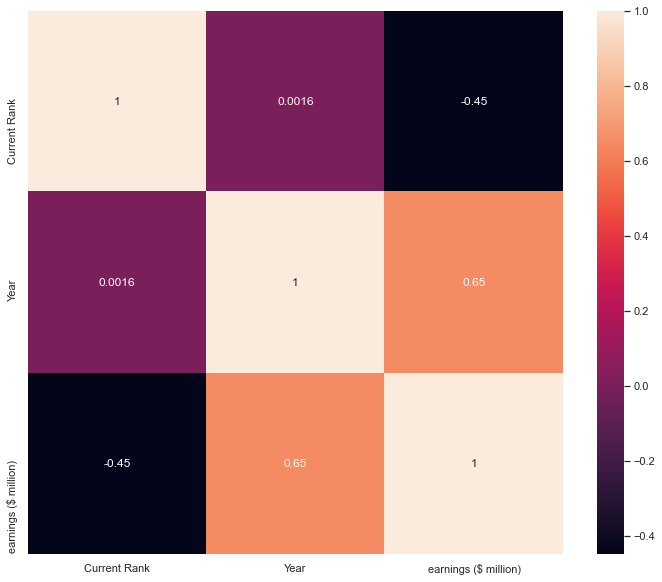

In [430]:
rank_yr_earnings = temp_df[['Current Rank', 'Year', 'earnings ($ million)']]
plt.figure(figsize=(12,10))
corr_coeff_mat = rank_yr_earnings.corr()
sns.heatmap(corr_coeff_mat, annot=True)
plt.show()
plt.close()

* There is a negatie correlation between an athlete's current ranking and their earnings. 
* There is a postive correlation between the year and earning's which would make sense due to the difference in wages and the consumer price index but I would expect this correlation to be the same even with athlete's wages adjusted to the current time period.

<AxesSubplot:xlabel='Year', ylabel='earnings ($ million)'>

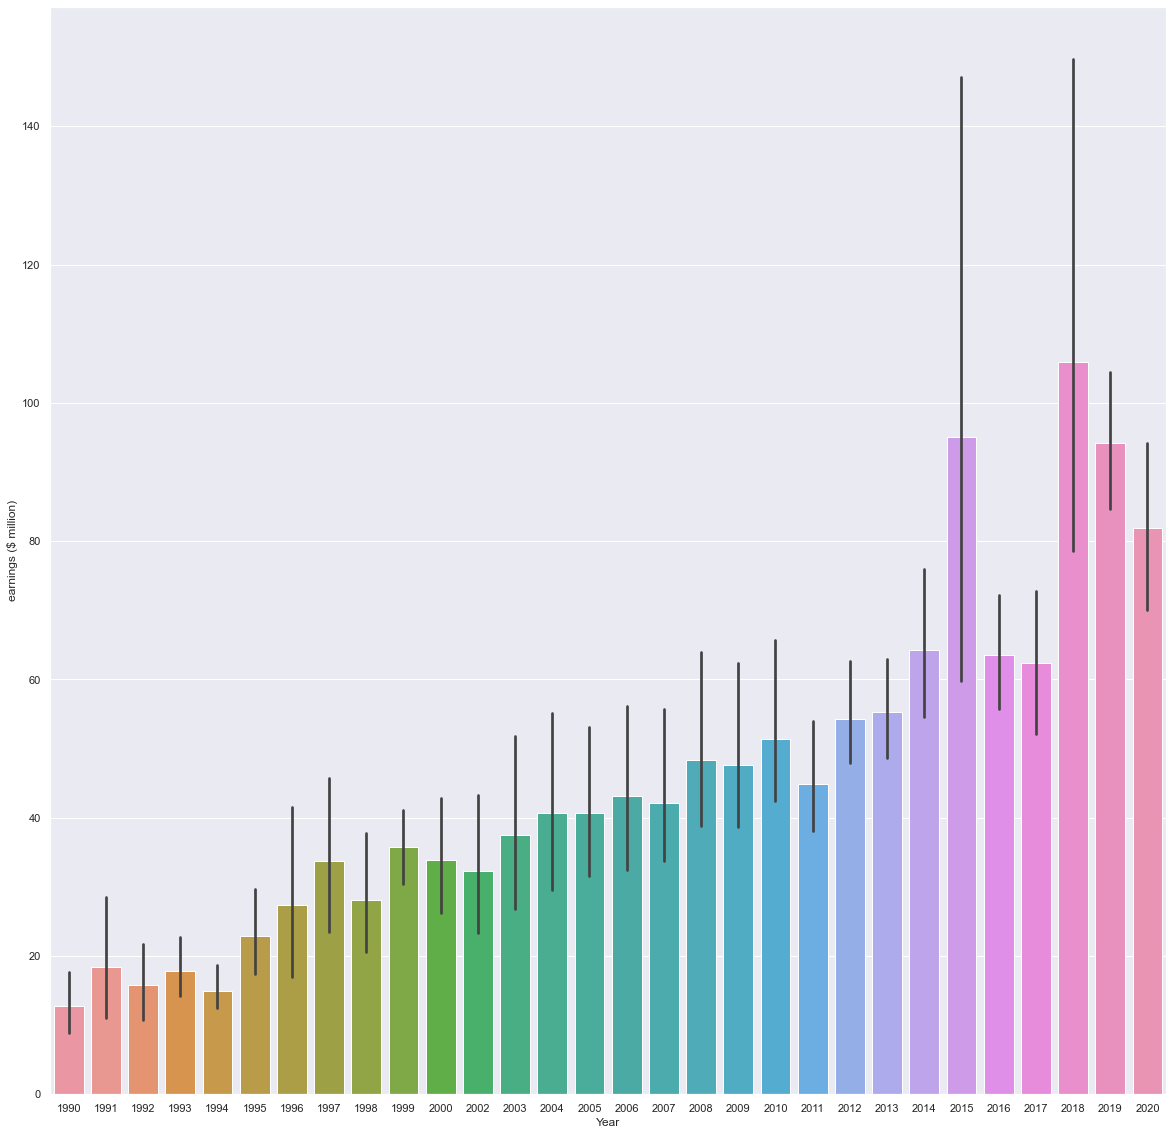

In [431]:
fig= plt.figure(figsize=(20, 20))
sns.barplot(x='Year' , y='earnings ($ million)',data=temp_df) 

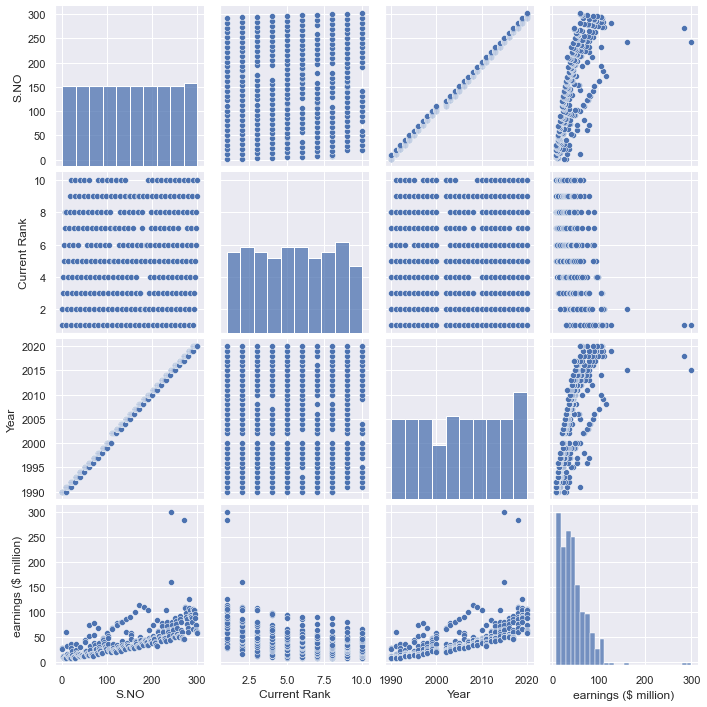

In [432]:
sns.pairplot(temp_df)

<AxesSubplot:>

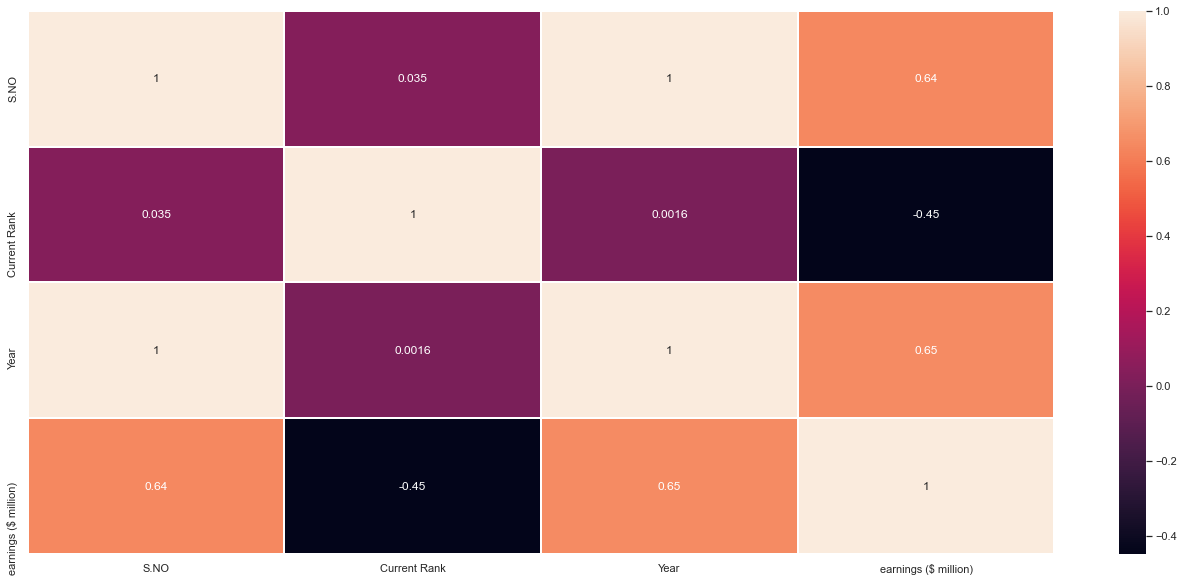

In [433]:
sns.heatmap(temp_df.corr(),annot=True,linewidths=1)